# GRIP: The Sparks Foundation

## Internship: Data Science & Business Analytics, November, 2020

### Author: SUBHAJIT BANERJEE

#### Task#2 : Prediction using Unsupervised ML

### Clustering Assignment 
Problem Statement: The main objective is to predict the optimum number of clusters and represent it visually.

#### Steps that we follow:
1. Reading the dataset
2. Checking and cleaning the data
3. EDA
4. Prepare the data for Modelling
5. Modelling
6. Visualize and present the set after modelling

In [1]:
# Import warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required library
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
# Importing and reading the dataset
iris_data = pd.read_csv(r'D:\The Spark Foundation\Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Info Checking
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Column wise Null value checking
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**No Null value present.**

In [6]:
# Row wise null value checking
iris_data.isna().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Length: 150, dtype: int64

**No null value present**

In [7]:
# Duplicate value checking
iris_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

**No duplicate value**

In [8]:
# Counting each species present in the dataset
iris_data.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

**All Species are in same quantity**

## EDA Analysis

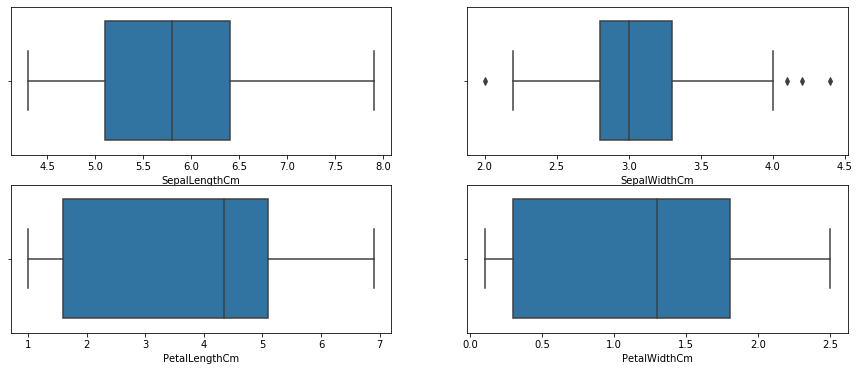

In [9]:
# Boxplot for all four numeric columns
plt.figure(figsize = (15,6))
features = iris_data.columns[1:5]
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(iris_data[i[1]])

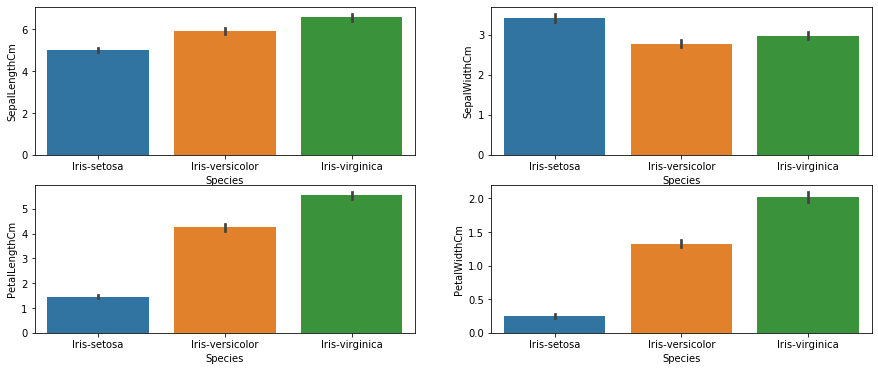

In [10]:
# Barplot for all four numeric columns & comparison with Species attribute
plt.figure(figsize = (15,6))
features = iris_data.columns[1:5]
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.barplot(x=iris_data['Species'], y=iris_data[i[1]])

### Preparing data for Modelling

In [11]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [13]:
# Hopkins Score
hopkins(iris_data.drop(['Id','Species'], axis = 1))

0.8347019749629927

As we know the Hopkins Statistics is a way of measuring the clustering tendency of a dataset. And the score signifies that there is a distinct number of cluster is present in our dataset.

## Modelling

### Rescalling Data

In [14]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [15]:
# Rescalling Dataset for numeric columns
scaler = StandardScaler()
column_scaled = scaler.fit_transform(iris_data.drop(['Id','Species'],axis=1))
column_scaled.shape

(150, 4)

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Finding the optimul Number of Cluster

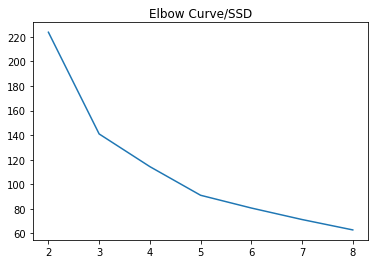

In [17]:
# Checking the elbow-curve/SSD
ssd = []
for i in range(2,9):
    kmeans = KMeans(n_clusters=i).fit(column_scaled)
    ssd.append([i, kmeans.inertia_])
    
# plot the SSDs for each n_clusters

temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.title('Elbow Curve/SSD')
plt.show()

In [18]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(column_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(column_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.580184463257396
For n_clusters=3, the silhouette score is 0.45840087099074767
For n_clusters=4, the silhouette score is 0.39785665098541767
For n_clusters=5, the silhouette score is 0.3516422319268987
For n_clusters=6, the silhouette score is 0.3260759517825793
For n_clusters=7, the silhouette score is 0.3269610208831664
For n_clusters=8, the silhouette score is 0.3540033528971936


So after checking the **Elbow Curve** & **Silhouette Score** we can choose our **final K as 3**. Because We have seen that in the **Sum of Squared Distance** Curve the 1st knee like bend has come at the level of 3. and in the silhouette score, the score of k=3 is also considerable for clustering. Though in the silhouette score for 2 is quite impressive from score of 3, but intuitively we can say from the point of our dataset that choosing the cluster number at 2 might not give us a optimul result that we can expect for. So for better clustering and better outcome of our analysis, we will choose our final number of cluster as 3.

In [19]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Hierarchical Clustering

### Reconfirming the number of cluster

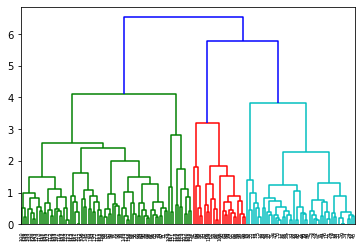

In [20]:
mergin = linkage(column_scaled, method='complete', metric='euclidean')
dendrogram(mergin)
plt.show()

Now this dendrogram clearly indicate **K=3**. If we cut the tree between 4-5 and draw a straight line we can get 3 distinct set of clusters.

So we will move ahead with K-Means process

In [21]:
# Final Number of Cluster = 3

kmeans = KMeans(n_clusters = 3, random_state=50)
y_kmeans = kmeans.fit(column_scaled)
y_kmeans_predict = y_kmeans.predict(column_scaled)
y_kmeans_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

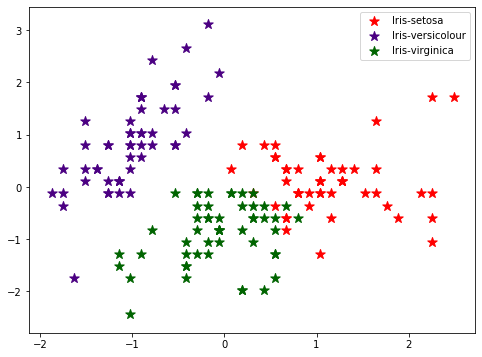

In [22]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(8,6))
plt.scatter(column_scaled[y_kmeans_predict == 0, 0], column_scaled[y_kmeans_predict == 0, 1], 
            s = 100, marker='*', c = 'red', label = 'Iris-setosa')
plt.scatter(column_scaled[y_kmeans_predict == 1, 0], column_scaled[y_kmeans_predict == 1, 1], 
            s = 100, marker='*', c = 'indigo', label = 'Iris-versicolour')
plt.scatter(column_scaled[y_kmeans_predict == 2, 0], column_scaled[y_kmeans_predict == 2, 1],
            s = 100, marker='*', c = 'darkgreen', label = 'Iris-virginica')
plt.legend()
plt.show()

## Conclusion:

### Number of Optimul Cluster is 3

**There is 3 distinct set of cluster are seen from the above plot.** 
1. Iris-Setosa is marked as Red

2. Iris-Versicolor is marked as Indigo

3. Iris-Verginica is marked as Green



### The End